In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
uber_data = pd.read_csv("../dataset/uber_data.csv")

In [23]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [24]:
uber_data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


#### Unique Bookings

In [25]:
len(uber_data['Booking ID'].unique())

148767

#### What are the unique vehicle types used?

In [26]:
vehicle_type_data = uber_data['Vehicle Type'].value_counts().reset_index()

#### Pie Chart for Vehicle type

In [39]:
vehicle_type_data["Vehicle Type"]

0             Auto
1          Go Mini
2         Go Sedan
3             Bike
4    Premier Sedan
5            eBike
6          Uber XL
Name: Vehicle Type, dtype: object

In [42]:
vehicle_type_data 

,Vehicle Type,count
0,Auto,37419
1,Go Mini,29806
2,Go Sedan,27141
3,Bike,22517
4,Premier Sedan,18111
5,eBike,10557
6,Uber XL,4449


<Axes: xlabel='Vehicle Type', ylabel='count'>

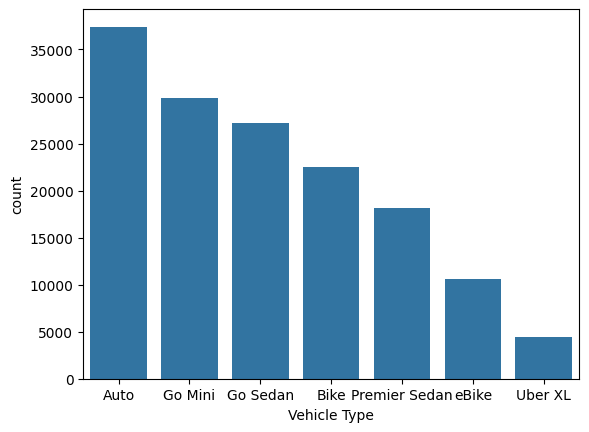

In [47]:
sns.barplot(data=vehicle_type_data, x="Vehicle Type", y="count")

In [242]:
booking_status_data = uber_data.aggregate("Booking Status").value_counts()
booking_status_data

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

(np.float64(-1.0999992185550287),
 np.float64(1.0999958667055814),
 np.float64(-1.0999983267799534),
 np.float64(1.099999920322855))

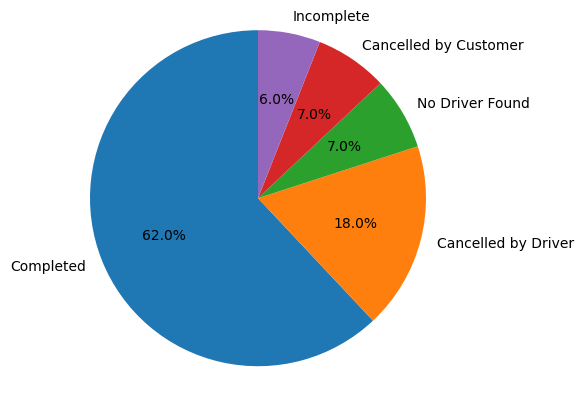

In [254]:
plt.pie(booking_status_data, labels=booking_status_data.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

In [74]:
booking_status_data

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

#### Which month has the highest number of completed rides?

In [75]:
uber_data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [76]:
uber_data['Date'] = pd.to_datetime(uber_data['Date'])

In [ ]:
# uber_data.groupby(uber_data["Date"].dt.month and uber_data['Booking Status'] == 'Completed').count()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [96]:
uber_data['Booking Status'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Name: Booking Status, Length: 150000, dtype: bool

In [ ]:
uber_data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


In [103]:
uber_data["Time"].str.split(":").str[0]

0         12
1         18
2         08
3         17
4         22
          ..
149995    19
149996    15
149997    10
149998    07
149999    15
Name: Time, Length: 150000, dtype: object

In [108]:
def get_time(hour):
    print(hour)
    if 0 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 20:
        return "Evening"
    else:
        return "Night"

In [112]:
uber_data["Hour"] = uber_data["Time"].str.split(":").str[0].astype(int)
uber_data['day_time'] = uber_data['Hour'].apply(get_time)

12
18
8
17
22
9
15
17
12
19
16
8
22
19
18
15
10
15
9
19
21
6
11
20
16
6
9
19
18
12
17
5
18
14
19
19
13
3
15
13
9
10
19
19
21
21
7
13
0
9
21
18
22
11
17
5
10
15
10
10
12
16
11
4
18
9
9
12
11
20
19
10
21
11
21
17
21
7
8
18
9
11
17
16
10
12
17
16
18
2
21
12
13
20
20
16
18
17
8
18
18
19
20
15
18
11
16
14
16
19
15
17
15
18
11
10
6
22
13
8
16
10
18
13
19
5
18
15
14
17
17
17
17
16
12
16
22
9
1
18
20
10
17
19
18
23
19
20
18
21
20
12
21
22
16
10
18
19
6
16
12
19
6
19
6
12
23
6
16
7
14
7
16
12
9
1
21
6
22
18
17
21
22
14
9
12
22
16
19
21
18
21
2
23
12
20
10
19
16
20
14
22
18
7
19
16
20
3
18
8
16
21
19
20
21
10
15
10
7
17
21
8
8
6
9
15
4
6
21
19
9
17
18
18
15
14
10
2
11
21
19
16
14
10
17
23
10
8
9
21
13
13
20
8
16
10
11
15
17
8
5
8
11
18
14
21
7
9
18
20
9
19
12
19
14
18
21
16
7
17
19
21
11
3
20
19
20
19
18
18
10
21
14
16
1
16
18
17
21
14
20
20
13
11
11
21
11
9
8
15
12
1
22
13
15
6
21
3
6
15
16
9
22
17
8
2
18
19
10
18
20
9
1
2
13
11
16
13
14
19
15
13
10
17
20
8
2
16
17
9
21
17
21
15
18
17
12
18
14


In [118]:
day_time_data = uber_data.aggregate("day_time").value_counts().reset_index()
day_time_data

,day_time,count
0,Morning,52234
1,Evening,44121
2,Afternoon,27709
3,Night,25936


/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_81251/2374853938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(day_time_data, x="day_time", y="count", palette=palette)


<Axes: xlabel='day_time', ylabel='count'>

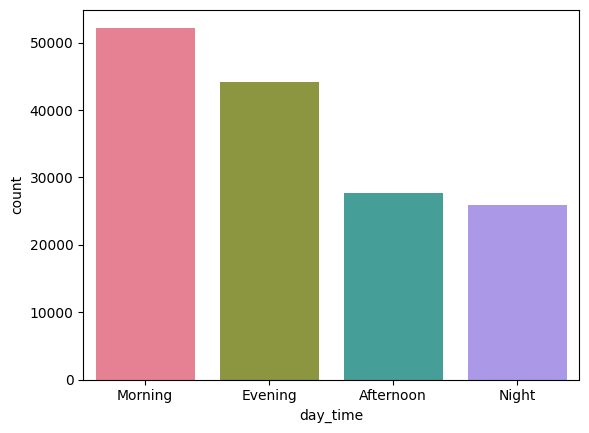

In [126]:
palette = sns.color_palette('husl', len(day_time_data['day_time']))
sns.barplot(day_time_data, x="day_time", y="count", palette=palette)

In [132]:
uber_data['day'] = uber_data['Date'].dt.day_name()

In [136]:
def get_day(day):
    if day == "Saturday" or day == "Sunday":
        return 'Weekend'
    else:
        return "Weekday"


In [137]:
uber_data['weekday'] = uber_data['day'].apply(get_day)

In [155]:
days_booking_status = uber_data.groupby('weekday').aggregate("Booking Status").value_counts().reset_index()
days_booking_status

,weekday,Booking Status,count
0,Weekday,Completed,66244
1,Weekday,Cancelled by Driver,19291
2,Weekday,Cancelled by Customer,7538
3,Weekday,No Driver Found,7529
4,Weekday,Incomplete,6458
5,Weekend,Completed,26756
6,Weekend,Cancelled by Driver,7709
7,Weekend,No Driver Found,2971
8,Weekend,Cancelled by Customer,2962
9,Weekend,Incomplete,2542


In [165]:
total_counts = uber_data['weekday'].value_counts().reset_index()

In [168]:
completion_count = days_booking_status.loc[days_booking_status['Booking Status'] == "Completed"]
completion_count

,weekday,Booking Status,count
0,Weekday,Completed,66244
5,Weekend,Completed,26756


In [187]:
completion_count = days_booking_status.loc[days_booking_status['Booking Status'] == "Completed"]
total_counts['completion_count'] = completion_count['count'].values
total_counts['completion_percent'] = round((total_counts['completion_count'] / total_counts['count']) * 100, 2)
total_counts

,weekday,count,completion_count,completion_percent
0,Weekday,107060,66244,61.88
1,Weekend,42940,26756,62.31


In [181]:
total_counts['completion_percent'] = round((total_counts['completion_count'] / total_counts['count']) * 100, 2)

In [188]:
total_counts

,weekday,count,completion_count,completion_percent
0,Weekday,107060,66244,61.88
1,Weekend,42940,26756,62.31


### Customer & Driver Behavior

#### Which customers made the most bookings?

In [199]:
uber_data["Ride Distance"].fillna(0, inplace=True)

In [195]:
uber_data.aggregate("Customer ID").value_counts().reset_index().sort_values('count', ascending=False).head(10)

,Customer ID,count
0,"""CID4523979""",3
2,"""CID5481002""",3
3,"""CID6715450""",3
4,"""CID7828101""",3
5,"""CID6468528""",3
1,"""CID8727691""",3
803,"""CID7267162""",2
810,"""CID1635090""",2
809,"""CID9023766""",2
808,"""CID1546521""",2


#### What is the average ride distance for each vehicle type?

In [204]:
vehicle_average_distance = uber_data.groupby('Vehicle Type').aggregate('Ride Distance').mean()

In [209]:
vehicle_average_distance.reset_index()

,Vehicle Type,Ride Distance
0,Auto,16.719194
1,Bike,16.816909
2,Go Mini,16.815426
3,Go Sedan,16.609322
4,Premier Sedan,16.726638
5,Uber XL,16.701913
6,eBike,16.998785


/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_81251/320084571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(vehicle_average_distance.reset_index(), x="Vehicle Type", y="Ride Distance", palette=palette)


<Axes: xlabel='Vehicle Type', ylabel='Ride Distance'>

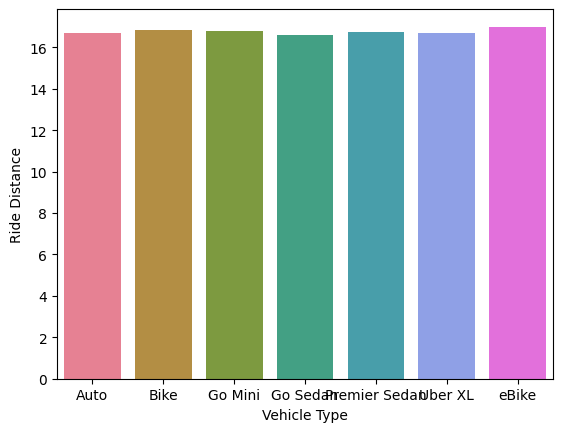

In [215]:
palette = sns.color_palette('husl', len(vehicle_average_distance))
sns.barplot(vehicle_average_distance.reset_index(), x="Vehicle Type", y="Ride Distance", palette=palette)

#### Which pickup location had the maximum number of cancellations by customers?

In [224]:
uber_data.loc[uber_data['Booking Status'] == "Cancelled by Customer"].aggregate("Pickup Location").value_counts().head()

Pickup Location
Seelampur          81
Preet Vihar        80
Keshav Puram       79
Akshardham         78
Mansarovar Park    75
Name: count, dtype: int64

#### What are the top 5 most common drop locations?

In [227]:
uber_data['Drop Location'].value_counts().head(5)

Drop Location
Ashram             936
Basai Dhankot      917
Lok Kalyan Marg    916
Narsinghpur        913
Cyber Hub          912
Name: count, dtype: int64

### Performance Metrics

#### Calculate the average Booking Value for each vehicle type.

In [229]:

uber_data['Booking Value'].fillna(0, inplace=True)

/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_81251/2457802912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['Booking Value'].fillna(0, inplace=True)


In [252]:
booking_value_by_Vtype = uber_data.groupby("Vehicle Type").aggregate('Booking Value').mean() 
booking_value_by_Vtype

Vehicle Type
Auto             344.167990
Bike             348.079096
Go Mini          346.859558
Go Sedan         345.223794
Premier Sedan    346.492850
Uber XL          343.455158
eBike            342.756939
Name: Booking Value, dtype: float64

([<matplotlib.patches.Wedge at 0x3149cc2d0>,
 [Text(0.9917611665497917, 0.47582537608223086, 'Auto'),
  Text(0.2440161899453946, 1.0725931656711847, 'Bike'),
  Text(-0.6913023314831352, 0.855629058930318, 'Go Mini'),
  Text(-1.0999619131536755, -0.009153666549859914, 'Go Sedan'),
  Text(-0.6773805838099166, -0.8666923010373039, 'Premier Sedan'),
  Text(0.2543866263953987, -1.0701810334290025, 'Uber XL'),
  Text(0.9926327274814317, -0.47400450243934816, 'eBike')],
 [Text(0.5409606362998863, 0.25954111422667137, '14.2%'),
  Text(0.1330997399702152, 0.5850508176388279, '14.4%'),
  Text(-0.377073998990801, 0.46670675941653705, '14.4%'),
  Text(-0.5999792253565502, -0.004992909027196316, '14.3%'),
  Text(-0.3694803184417727, -0.4727412551112566, '14.3%'),
  Text(0.13875634167021747, -0.5837351091430922, '14.2%'),
  Text(0.54143603317169, -0.2585479104214626, '14.2%')])

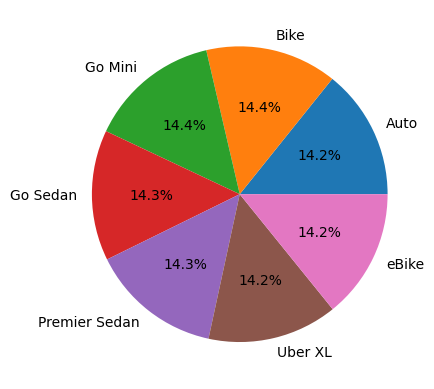

In [255]:
plt.pie(booking_value_by_Vtype,labels=booking_value_by_Vtype.index, autopct="%1.1f%%")

#### What is the average Customer Rating vs. Driver Ratings per vehicle type?

In [260]:
uber_data
# uber_data['Customer Rating'].fillna(uber_data['Customer Rating'].mean(), inplace=True)
uber_data['Driver Ratings'].fillna(uber_data['Driver Ratings'].mean(), inplace=True)

/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_81251/690978103.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['Driver Ratings'].fillna(uber_data['Driver Ratings'].mean(), inplace=True)


In [264]:
uber_data.groupby("Vehicle Type").aggregate(Customer_Rating_Mean=("Customer Rating", 'mean'), Driver_Ratings_Mean = ("Driver Ratings", 'mean'))

,Customer_Rating_Mean,Driver_Ratings_Mean
Vehicle Type,,
Auto,4.402985,4.231844
Bike,4.404183,4.230409
Go Mini,4.404405,4.228940
Go Sedan,4.407909,4.231496
Premier Sedan,4.403884,4.233398
Uber XL,4.404751,4.235589
eBike,4.404193,4.227655


#### Find the average VTAT (Vehicle Time Arrival Time) and CTAT (Customer Time Arrival Time) by vehicle type.

In [267]:
uber_data['Avg CTAT'].fillna(uber_data['Avg CTAT'].mean(), inplace=True)
uber_data['Avg VTAT'].fillna(uber_data['Avg VTAT'].mean(), inplace=True)

/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_81251/4067990201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['Avg CTAT'].fillna(uber_data['Avg CTAT'].mean(), inplace=True)


In [ ]:
uber_data.groupby('Vehicle Type').aggregate(Average_VTAT_By_Category=("Avg VTAT", 'mean'),Average_CTAT_By_Category=("Avg CTAT", 'mean')).reset_index()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Hour,day_time,day,weekday,DayType
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,29.149636,...,0.0,0.00,4.230992,4.404584,NaN,12,Afternoon,Saturday,Weekend,Weekend
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,...,237.0,5.73,4.230992,4.404584,UPI,18,Evening,Friday,Weekday,Weekday
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.800000,...,627.0,13.58,4.900000,4.900000,Debit Card,8,Morning,Friday,Weekday,Weekday
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,...,416.0,34.02,4.600000,5.000000,UPI,17,Evening,Monday,Weekday,Weekday
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.600000,...,737.0,48.21,4.100000,4.300000,UPI,22,Night,Monday,Weekday,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.200000,44.400000,...,475.0,40.08,3.700000,4.100000,Uber Wallet,19,Evening,Monday,Weekday,Weekday
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.100000,30.800000,...,1093.0,21.31,4.800000,5.000000,UPI,15,Afternoon,Sunday,Weekend,Weekend
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.700000,23.400000,...,852.0,15.93,3.900000,4.400000,Cash,10,Morning,Wednesday,Weekday,Weekday
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.900000,39.600000,...,333.0,45.54,4.100000,3.700000,UPI,7,Morning,Saturday,Weekend,Weekend


#### What is the cancellation rate (Cancelled Rides / Total Rides)?

In [297]:

total_rides = uber_data["Booking ID"].count()
total_canceled_ride = uber_data.loc[uber_data['Booking Status'] == 'Cancelled by Customer']['Booking Status'].count()
total_rides

np.int64(150000)

In [296]:
cancellation_rate = total_canceled_ride / total_rides
cancellation_rate

np.float64(0.07)

### Payment & Revenue

#### Which payment method is most frequently used?

In [305]:
uber_data['Payment Method'].value_counts().reset_index().head(1)

,Payment Method,count
0,Cash,73367


#### Which payment method generated the highest revenue?

In [315]:
payment_method_value = uber_data.groupby("Payment Method").aggregate("Booking Value").sum().sort_values(ascending=False).reset_index()

In [316]:
payment_method_value

,Payment Method,Booking Value
0,Cash,29486427.56
1,UPI,23345101.00
2,Uber Wallet,6200898.00
3,Credit Card,5224025.00
4,Debit Card,4180510.00


/var/folders/g2/c4ppjm_x53lfmhpz_sqp533r0000gn/T/ipykernel_81251/2421197666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(payment_method_value, x="Payment Method", y="Booking Value", palette=palette)


<Axes: xlabel='Payment Method', ylabel='Booking Value'>

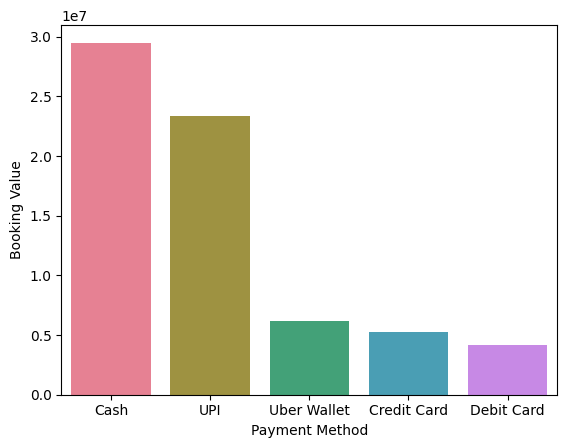

In [317]:
palette = sns.color_palette('husl', len(payment_method_value))
sns.barplot(payment_method_value, x="Payment Method", y="Booking Value", palette=palette)